In [30]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# import the required libraries
import scipy.io
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D 
import time
import numpy as np
import pandas as pd
import os
import matplotlib.pylab as plt
%matplotlib inline

In [10]:
# Obtain the x,y columns from the training and test data respectively
x_train = scipy.io.loadmat("/content/drive/My Drive/sml/train_32x32.mat")['X']
y_train = scipy.io.loadmat("/content/drive/My Drive/sml/train_32x32.mat")['y']
x_test = scipy.io.loadmat("/content/drive/My Drive/sml/test_32x32.mat")['X']
y_test = scipy.io.loadmat("/content/drive/My Drive/sml/test_32x32.mat")['y']

In [11]:
# training data x has shape of
x_train.shape

(73257, 32, 32, 3)

In [13]:
# training label y has shape of
y_train.shape

(73257, 1)

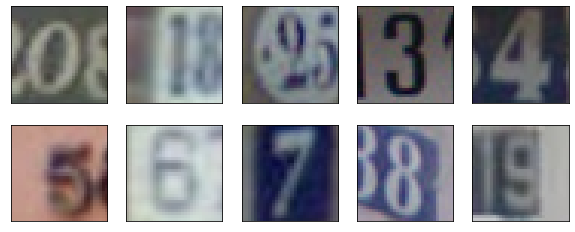

In [14]:
# plotting some random 10 images
fig = plt.figure(figsize=(10,4))
for i in range(classes):
    axis = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    y_indexx = np.where(y_train[:]==i)[0]
    x_cluster = x_train[y_indexx,::]
    image_pos = np.random.randint(x_cluster.shape[0])
    single_image = (x_cluster[image_pos,::])
    plt.imshow(single_image)
plt.show()

In [15]:
# one hot encoding the class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, classes)
y_test = keras.utils.to_categorical(y_test, classes)

In [16]:
# Printing sample data
print(y_train[:10])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [18]:
# stacking up the convolution model
model = Sequential()
model.add(Conv2D(64, (5, 5), padding='same',strides = 1,
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(64, (5, 5),padding='same',strides = 1))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides = 2))

model.add(Conv2D(128, (5, 5), padding='same',strides = 1))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(3072))
model.add(Activation('relu'))
model.add(Dense(2048 ))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(classes))
model.add(Activation('softmax'))

In [19]:
# summary of the model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        4864      
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        102464    
_________________________________________________________________
activation_7 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 16, 16, 64)       

In [21]:
# compile the model and fit it with SGD optimizer with learning rate 0.02
opt = keras.optimizers.SGD(learning_rate=0.02)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input image
x_train /= 255
x_test /= 255

In [22]:
# Training the model
batch_size = 64
classes = 10
epochs = 22
values =  model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/22
1145/1145 [==============================] - 48s 14ms/step - loss: 1.9290 - accuracy: 0.3865 - val_loss: 0.7555 - val_accuracy: 0.7629
Epoch 2/22
1145/1145 [==============================] - 15s 13ms/step - loss: 0.4744 - accuracy: 0.8555 - val_loss: 0.5247 - val_accuracy: 0.8447
Epoch 3/22
1145/1145 [==============================] - 15s 13ms/step - loss: 0.3201 - accuracy: 0.9034 - val_loss: 0.5494 - val_accuracy: 0.8305
Epoch 4/22
1145/1145 [==============================] - 15s 13ms/step - loss: 0.2403 - accuracy: 0.9284 - val_loss: 0.4197 - val_accuracy: 0.8771
Epoch 5/22
1145/1145 [==============================] - 15s 13ms/step - loss: 0.1901 - accuracy: 0.9445 - val_loss: 0.4382 - val_accuracy: 0.8707
Epoch 6/22
1145/1145 [==============================] - 15s 13ms/step - loss: 0.1436 - accuracy: 0.9601 - val_loss: 0.4394 - val_accuracy: 0.8801
Epoch 7/22
1145/1145 [==============================] - 15s 13ms/step - loss: 0.1020 - accuracy: 0.9714 - val_loss: 0.4111 -

In [23]:
values.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
#print the train and validation accuracy
print("Training accuracy is ",values.history['accuracy'][-1])
print("Test accuracy is ",values.history['val_accuracy'][-1])

Training accuracy is  0.9996587634086609
Test accuracy is  0.9046173691749573


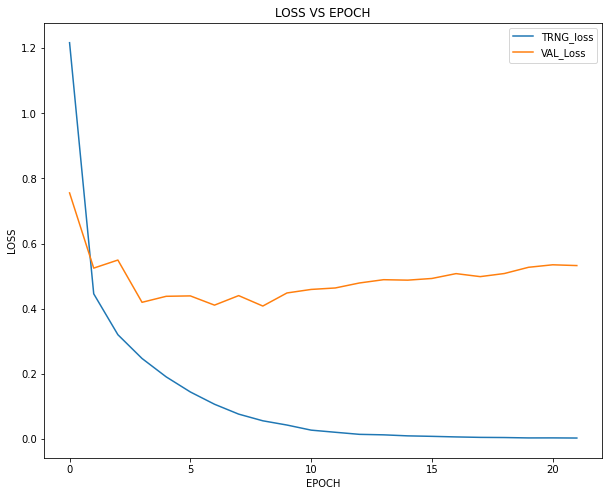

In [29]:
# lets plot training loss and validation loss vs epoch
plt.figure(figsize=(10,8))
plt.plot(values.history['loss'])
plt.plot(values.history['val_loss'])
plt.title('LOSS VS EPOCH')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['TRNG_loss', 'VAL_Loss'], loc='upper right')
plt.show()